In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
no_samples=100
centers=[[-0.5,-0.5],[0.5,-0.5]]
X,y=datasets.make_blobs(n_samples=no_samples,centers=centers,cluster_std=0.4,random_state=123)

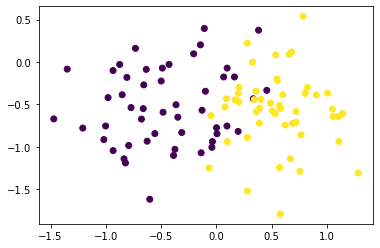

In [3]:

plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
import torch.nn as nn

In [5]:
class module(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear=nn.Linear(in_features=input_size,out_features=output_size)
  def forward(self,x):
    pred=torch.sigmoid(self.linear(x))
    return pred

In [6]:
torch.manual_seed(2)
model_perc=module(2,1)

In [7]:
[w,b]=model_perc.parameters()
w1=w[0][0]
w2=w[0][1]
b1=b[0]
def get_params():
  return(w1.item(),w2.item(),b1.item())

In [8]:
def plot_fig():
  w1,w2,b1=get_params()
  x1=np.array([-1.5,1.5])
  x2=(w1*x1+b1)/(-w2)
  plt.plot(x1,x2,'r')
  plt.scatter(X[:,0],X[:,1],c=y)
  plt.show()

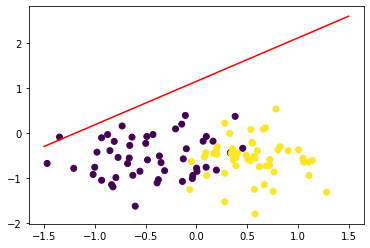

In [9]:
plot_fig() #Initial Model 

In [10]:
criterion=nn.BCELoss()
optimiser=torch.optim.SGD(params=model_perc.parameters(),lr=0.01)
x_data=torch.Tensor(X)
y_data=torch.Tensor(y.reshape(100,1))

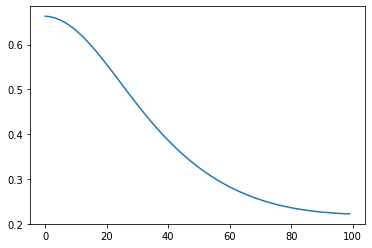

In [11]:
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model_perc.forward(x_data)
  loss=criterion(y_pred,y_data)
  losses.append(loss.item())
  optimiser.zero_grad
  loss.backward()
  optimiser.step()

plt.plot(range(epochs),losses)

In [12]:
print(losses)

[0.6632028222084045, 0.6625983715057373, 0.6613920331001282, 0.6595897078514099, 0.6571998000144958, 0.6542335748672485, 0.6507047414779663, 0.6466298699378967, 0.6420280337333679, 0.6369205117225647, 0.6313309669494629, 0.6252850294113159, 0.6188105940818787, 0.611936628818512, 0.6046940088272095, 0.5971149206161499, 0.5892320871353149, 0.5810794234275818, 0.5726907849311829, 0.5641005039215088, 0.5553423762321472, 0.5464498400688171, 0.5374556183815002, 0.528391420841217, 0.5192872881889343, 0.5101722478866577, 0.5010733604431152, 0.4920157194137573, 0.4830226004123688, 0.4741152226924896, 0.4653126895427704, 0.4566320478916168, 0.4480881094932556, 0.43969395756721497, 0.43146076798439026, 0.4233975112438202, 0.41551199555397034, 0.40781018137931824, 0.4002966582775116, 0.39297494292259216, 0.3858472406864166, 0.3789147436618805, 0.37217795848846436, 0.3656364381313324, 0.35928940773010254, 0.35313525795936584, 0.34717193245887756, 0.3413974344730377, 0.3358089327812195, 0.3304037451

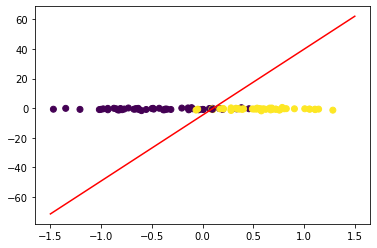

In [13]:
plot_fig()